## Excercise - WM data

**Task:** 
Visualize the images and time series of WM (Weather Monitor) data

**Steps:**
- import libraries
- load data (.jpg & .json format) and process them
- plot data (keep in mind qualities of good data visualization)

**Bonus:**
- associate time of images with the values of sky temperature

In [1]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.dates as md
from PIL import Image
import requests

In [2]:
## load time series data and process them

# load data to Pandas Data Frame
wm_files = ['https://github.com/space-lab-sk/amon-es/raw/develop/data_samples/wmt_2020-05-21.json',
            'https://github.com/space-lab-sk/amon-es/raw/develop/data_samples/wmt_2020-05-22.json']
            
df_list = []
for item in wm_files:
    df = pd.read_json(item, orient='records')
    df_list.append(df)

# cloud watcher data frame (cwdf)
cwdf = pd.concat(df_list, axis=0, ignore_index=True)
cwdf = cwdf.apply(pd.to_numeric, errors='coerce')   # convert all columns to numeric values

# set the date
cwdf = cwdf.set_index('Date')
cwdf.index = pd.to_datetime(cwdf.index)
print(cwdf.head())

                     Switch_state  Light_Sensor  ...  Sky_Temperature  Rain_Value
Date                                             ...                             
2020-05-21 00:00:01           NaN        1021.5  ...           -12.24      4095.8
2020-05-21 00:01:01           NaN        1021.3  ...           -12.16      4095.9
2020-05-21 00:02:01           NaN        1021.3  ...           -12.11      4095.8
2020-05-21 00:03:02           NaN        1021.3  ...           -12.10      4095.9
2020-05-21 00:04:01           NaN        1021.8  ...           -11.99      4095.9

[5 rows x 6 columns]


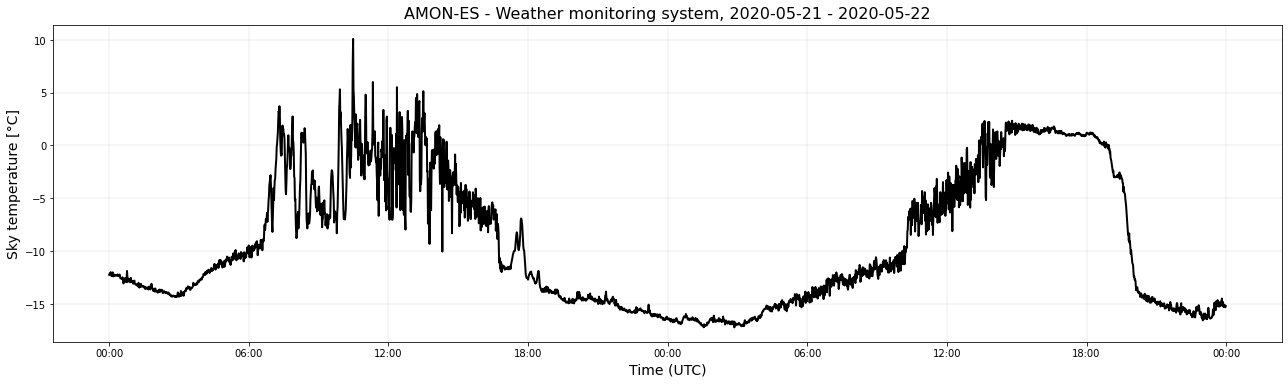

In [3]:
## plot data

plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
plt.xlabel('Time (UTC)', fontsize=14)
plt.ylabel('Sky temperature [°C]', fontsize=14)
plt.title('AMON-ES - Weather monitoring system, ' + str(cwdf.index[0])[:10] + ' - ' + str(cwdf.index[-1])[:10], fontsize=16)
plt.grid()
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(cwdf.index, cwdf.Sky_Temperature, color='black', linewidth=2)
plt.tight_layout()
plt.grid(linewidth=0.2)
plt.show()

In [4]:
## load image data

# load data to list of images
wm_images = ['https://github.com/space-lab-sk/amon-es/raw/develop/data_samples/wm_2020-05-21_17-05-38_150us_.jpg',
            'https://github.com/space-lab-sk/amon-es/raw/develop/data_samples/wm_2020-05-22_05-05-38_150us_.jpg',
            'https://github.com/space-lab-sk/amon-es/raw/develop/data_samples/wm_2020-05-22_17-05-37_150us_.jpg']

img_list = []
for item in wm_images:
    img = Image.open(requests.get(item, stream=True).raw)
    img_list.append(img)

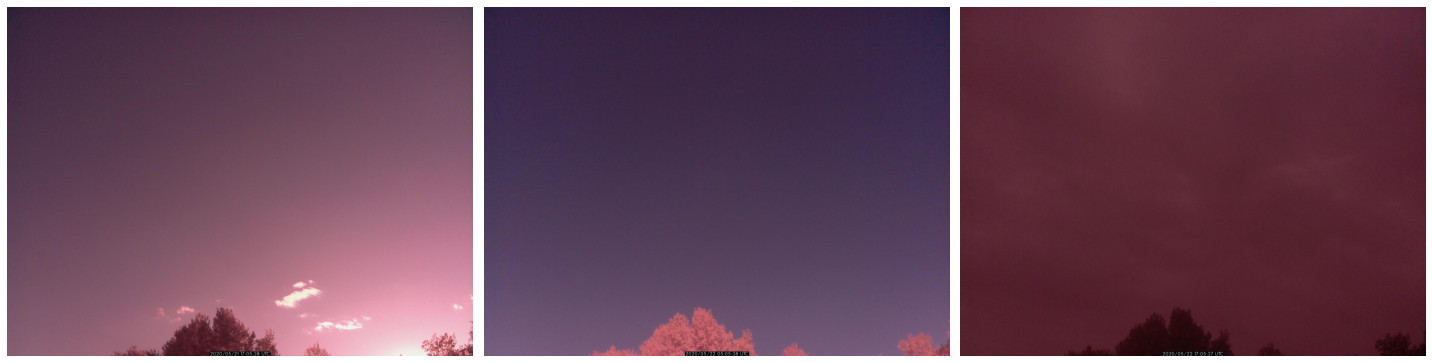

In [5]:
## plot images

plt.figure(figsize=(20,6))
gridspec.GridSpec(1,len(img_list))
for i in range(0,len(img_list)):
    rpimg = img_list[i]
    plt.subplot2grid((1,len(img_list)), (0,i), colspan=1)
    plt.imshow(rpimg)
    plt.axis('off')
    plt.tight_layout()

In [6]:
## BONUS:

# write your code here